In [18]:
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

class Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)
    
    def forward(self, x):
        return self.linear(x)
    
    def predict(self, x):
        return F.softmax(self.forward(x), dim=1)
    
    def test(self, test_loader):
        correct = 0
        total = len(test_loader.dataset)
        with torch.no_grad():
            for images, labels in tqdm(test_loader):
                outputs = self.forward(images.view(-1, 784))
                _, predict = torch.max(outputs.data, 1)
                correct += (predict == labels).sum().item()
        return correct / total

    def train(self, 
              training_set: datasets.DatasetFolder, 
              test_set: datasets.DatasetFolder,
              lr=0.001, 
              epoch = 10):
        size = len(training_set)
        training_set_size = int(size * 0.9)
        validation_set_size = size - training_set_size

        training_set, validation_set = torch.utils.data.random_split(training_set, [training_set_size, validation_set_size])
        train_loader = torch.utils.data.DataLoader(training_set, batch_size=100)
        validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=100)
        test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

        optimizer = torch.optim.Adam(self.parameters(), lr=lr)

        last_validity = 0
        for e in range(epoch):
            for images, labels in tqdm(train_loader):
                optimizer.zero_grad()
                outputs = self.forward(images.view(-1, 784))
                loss = F.cross_entropy(outputs, labels)
                loss.backward()
                optimizer.step()
            validity = self.test(validation_loader)
            print("[Iteration {}] Accuracy on validation set: {}".format(e, validity))
            if validity > last_validity:
                last_validity = validity
            else:
                break
        print("Training finished. Accuracy on test set: {}".format(self.test(test_loader)))
        torch.save(self.state_dict(), "logistic.pt")

    def display_layer_weight(self):
        fig, axs = plt.subplots(1, 10, figsize=(20, 2))
        for digit in range(10):
            axs[digit].imshow(self.linear.weight[digit].detach().view(28, 28))
        fig.savefig("layer_weights.png")

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
logistic = Logistic()
try:
    print("Loading saved model")
    logistic.load_state_dict(torch.load("logistic.pt"))
except:
    print("No saved model found, training from scratch")
    logistic.train(mnist_train, mnist_test)

Loading saved model
No saved model found, training from scratch


100%|██████████| 60/60 [00:00<00:00, 108.46it/s]


[Iteration 0] Accuracy on validation set: 0.9011666666666667


100%|██████████| 60/60 [00:00<00:00, 107.64it/s]


[Iteration 1] Accuracy on validation set: 0.9153333333333333


100%|██████████| 60/60 [00:00<00:00, 112.13it/s]


[Iteration 2] Accuracy on validation set: 0.9215


100%|██████████| 60/60 [00:00<00:00, 105.40it/s]


[Iteration 3] Accuracy on validation set: 0.9253333333333333


100%|██████████| 60/60 [00:00<00:00, 111.35it/s]


[Iteration 4] Accuracy on validation set: 0.9268333333333333


100%|██████████| 60/60 [00:00<00:00, 101.78it/s]


[Iteration 5] Accuracy on validation set: 0.9276666666666666


100%|██████████| 60/60 [00:00<00:00, 101.75it/s]


[Iteration 6] Accuracy on validation set: 0.9286666666666666


100%|██████████| 60/60 [00:00<00:00, 78.48it/s]


[Iteration 7] Accuracy on validation set: 0.928


100%|██████████| 100/100 [00:01<00:00, 79.71it/s]

Training finished. Accuracy on test set: 0.9253


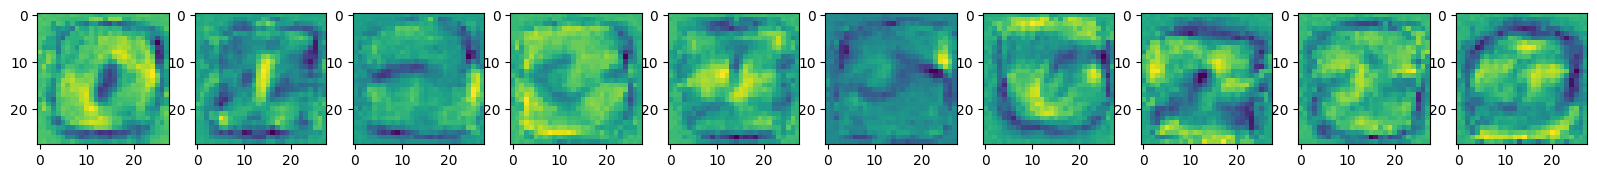

In [19]:
logistic.display_layer_weight()

# Math of training
## Logistic Regression

Let $x$ be the input and $y$ be the output.
\begin{align}
y = xW + b
\end{align}
where $x_{(1, n)}$, $W_{(n, m)}$, $b_{(1, m)}$, $y_{(1, m)}$.